In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
TF = 'GRHL2'
MBC_sample = 'MBC_315.ctDNA_deepWGS'
MBC_data_GC_corrected = pd.read_csv('../../MBC/deepWGS_TFBS_nucleosome_profiling_10000_sites/results/'+MBC_sample+'/'+MBC_sample+'.GC_corrected.coverage.tsv', sep='\t')
MBC_data_GC_map = pd.read_csv('../../MBC/deepWGS_TFBS_nucleosome_profiling_10000_sites/results/'+MBC_sample+'/'+MBC_sample+'.GC_map_corrected.coverage.tsv', sep='\t')

HD_sample = 'HD46.ctDNA.WGS.FC19269448'
HD_data_GC_corrected = pd.read_csv('../../MBC/deepWGS_TFBS_nucleosome_profiling_10000_sites/results/'+HD_sample+'/'+HD_sample+'.GC_corrected.coverage.tsv', sep='\t')
HD_data_GC_map = pd.read_csv('../../MBC/deepWGS_TFBS_nucleosome_profiling_10000_sites/results/'+HD_sample+'/'+HD_sample+'.GC_map_corrected.coverage.tsv', sep='\t')


In [3]:
HD_map_bias = pd.read_csv('../../GC_correction/deepWGS_GC_and_mappability_correction/results/mappability_bias/'+HD_sample+'.mappability_bias.txt', sep='\t')
HD_map_bias = HD_map_bias[(HD_map_bias['smoothed_map_bias']>0)]

MBC_map_bias = pd.read_csv('../../GC_correction/deepWGS_GC_and_mappability_correction/results/mappability_bias/'+MBC_sample+'.mappability_bias.txt', sep='\t')
MBC_map_bias = MBC_map_bias[(MBC_map_bias['smoothed_map_bias']>0)]


In [4]:
mappability = pd.read_csv('../../GC_and_mappability_content/GC_and_mappability_snakemake/results/'+TF+'.hg38.10000.mappability.tsv', sep='\t')

In [5]:
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

columns2 = np.arange(-990,990)
str_columns2 = [str(m) for m in columns2]


In [6]:
R = np.linspace(.122,1,7)
G = np.linspace(.467,1,7)
B = np.linspace(.706,1,7)

R2 = np.linspace(1, 1, 7)
G2 = np.linspace(.498,1,7)
B2 = np.linspace(.055,1,7)

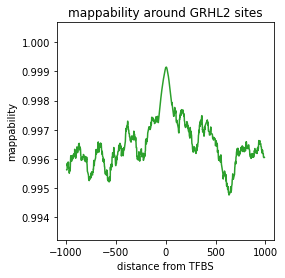

In [7]:
fig,axes = plt.subplots(1,1,figsize = (4.5,4))

ax = axes
ax.plot(columns2,np.nanmean(mappability[str_columns2], axis = 0), label = 'smoothed GC content', color = 'tab:green') 
# ax.fill_between(columns2, np.nanpercentile(GC_content[str_columns2],25, axis = 0), np.nanpercentile(GC_content[str_columns2],75, axis = 0), alpha = 0.25, color = 'tab:green', label = 'GC content +/- IQR')
ax.set_xlabel('distance from TFBS')
ax.set_ylabel('mappability')
#ax.legend(loc='upper left', bbox_to_anchor = [0,-.2])
ax.set_title('mappability around '+TF+' sites')
ax.margins(y=.35)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

fig.savefig('plots/GC_map_bias_demo_A.pdf')

In [8]:
MBC_map_bias

,mappable_percent,frequency,read_count,mean_map_bias,smoothed_map_bias
0,0,370784.0,515065.0,0.092050,0.186448
1,1,4010.0,25496.0,0.421321,0.305956
2,2,3986.0,26747.0,0.444655,0.415237
3,3,3938.0,27464.0,0.462139,0.431895
4,4,4098.0,28725.0,0.464486,0.440352
...,...,...,...,...,...
96,96,20597.0,458329.0,1.474546,1.515229
97,97,21454.0,485916.0,1.500852,1.527005
98,98,22645.0,516365.0,1.511017,1.542128
99,99,23776.0,547546.0,1.526043,1.557968


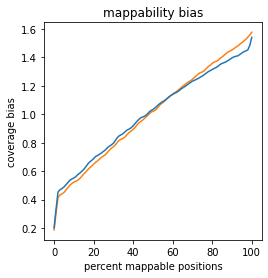

In [9]:
fig,axes = plt.subplots(1,1,figsize = (4.5,4))

ax = axes

ax.plot(MBC_map_bias['mappable_percent'],MBC_map_bias['smoothed_map_bias'], label = 'MBC', color = 'tab:orange')


ax.plot(HD_map_bias['mappable_percent'],HD_map_bias['smoothed_map_bias'], label = 'Healthy', color = 'tab:blue')
ax.set_xlabel('percent mappable positions')
ax.set_ylabel('coverage bias')
ax.set_title('mappability bias')

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    
fig.savefig('plots/GC_map_bias_demo_B.pdf')

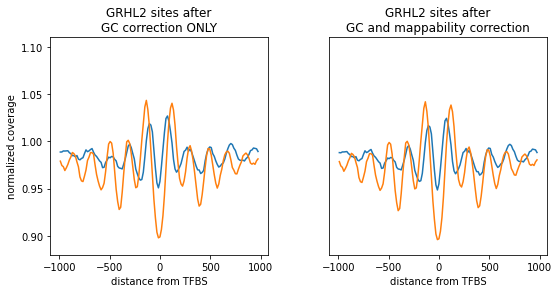

In [10]:
fig,axes = plt.subplots(1,2,figsize = (9,4), sharey=True)

ax = axes[0]
ax.plot(plot_columns,HD_data_GC_corrected[(HD_data_GC_corrected['site_name']==TF+'.hg38.10000')][str_plot_columns].T, label = 'Healthy')
ax.plot(plot_columns,MBC_data_GC_corrected[(MBC_data_GC_corrected['site_name']==TF+'.hg38.10000')][str_plot_columns].T, label = 'Breast\nCancer')
ax.set_title('GRHL2 sites after\nGC correction ONLY')
ax.set_xlabel('distance from TFBS')
ax.set_ylabel('normalized coverage')

ax = axes[1]
ax.plot(plot_columns,HD_data_GC_map[(HD_data_GC_map['site_name']==TF+'.hg38.10000')][str_plot_columns].T, label = 'Healthy')
ax.plot(plot_columns,MBC_data_GC_map[(MBC_data_GC_map['site_name']==TF+'.hg38.10000')][str_plot_columns].T, label = 'Breast\nCancer')
ax.set_title('GRHL2 sites after\nGC and mappability correction')
ax.set_xlabel('distance from TFBS')
ax.tick_params(left=False)

#ax.set_ylabel('normalized coverage')

ax.set_ylim(.88,1.11)
plt.yticks(np.arange(.9,1.1,0.05)) 

axes[0].set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
axes[1].set_aspect(1.0/ax.get_data_ratio(), adjustable='box')



fig.subplots_adjust(wspace = 0.25)
fig.savefig('plots/GC_map_bias_demo_C.pdf')